# Geração de gráficos Análise Exploratória

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Mortes_infantil_RJ.csv', low_memory=False)

In [4]:
selected_fields = ['LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT',
       'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS', 'LOCNASC', 'IDADEMAE',
       'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5',
       'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'SEMAGESTAC', 'CONSPRENAT', 'MESPRENAT',
       'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'DT_OBITO', 'CAUSABAS', 'DIAS_DE_VIDA',
       'OBITO_NEONATAL']


selected_fields_labels = {
    'LINKAGE_QTDFILVIVOANT': 'Linkage - Quantidade de Filhos Vivos Anteriores',
    'LINKAGE_QTDFILMORTANT': 'Linkage - Quantidade de Filhos Mortos Anteriores',
    'LINKAGE_PREMATANT': 'Linkage - Prematuridade Anterior',
    'LINKAGE_BAIXOPESOANT': 'Linkage - Baixo Peso ao Nascer Anterior',
    'LINKAGE_DIAS': 'Linkage - Dias de Vida',
    'LOCNASC': 'Local de Nascimento',
    'IDADEMAE': 'Idade da Mãe',
    'ESTCIVMAE': 'Estado Civil da Mãe',
    'CODOCUPMAE': 'Código da Ocupação da Mãe',
    'QTDFILVIVO': 'Quantidade de Filhos Vivos',
    'QTDFILMORT': 'Quantidade de Filhos Mortos',
    'GESTACAO': 'Duração da Gestação',
    'GRAVIDEZ': 'Tipo de Gravidez',
    'PARTO': 'Tipo de Parto',
    'CONSULTAS': 'Número de Consultas Pré-Natais',
    'DT_NASC': 'Data de Nascimento',
    'SEXO': 'Sexo do Recém-Nascido',
    'APGAR1': 'Índice de Apgar no 1º Minuto',
    'APGAR5': 'Índice de Apgar no 5º Minuto',
    'RACACOR': 'Raça/Cor',
    'PESO': 'Peso ao Nascer',
    'IDANOMAL': 'Presença de Anomalia Congênita',
    'ESCMAE2010': 'Escolaridade da Mãe em 2010',
    'RACACORMAE': 'Raça/Cor da Mãe',
    'QTDGESTANT': 'Quantidade de Gestações Anteriores',
    'QTDPARTNOR': 'Quantidade de Partos Normais Anteriores',
    'QTDPARTCES': 'Quantidade de Partos Cesáreos Anteriores',
    'SEMAGESTAC': 'Semanas de Gestação',
    'CONSPRENAT': 'Consistência do Prenatal',
    'MESPRENAT': 'Mês de Início do Prenatal',
    'TPAPRESENT': 'Tipo de Apresentação do Recém-Nascido',
    'STTRABPART': 'Situação do Trabalho de Parto',
    'STCESPARTO': 'Situação do Cesáreo',
    'TPNASCASSI': 'Tipo de Nascimento Assitido',
    'TPROBSON': 'Tipo de Robson',
    'PARIDADE': 'Paridade',
    'KOTELCHUCK': 'Classificação de Kotelchuck',
    'DT_OBITO': 'Data do Óbito',
    'CAUSABAS': 'Causa do Óbito',
    'DIAS_DE_VIDA': 'Dias de Vida',
    'OBITO_NEONATAL': 'Óbito Neonatal'
}

# Counts

In [5]:

def counts(df, feature, desc, mapping):
    # Create the output directory if it does not exist
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)

    # Aplicar o mapeamento à coluna RACACOR
    if mapping:
        df['DESC'] = df[feature].map(mapping)
    else:
        df['DESC'] = df[feature]

    # Crie uma nova figura com dois subplots lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Gráfico de barras horizontais para OBITO_NEONATAL = 0
    order_0 = df[df['OBITO_NEONATAL'] == 0]['DESC'].value_counts().index
    prop_0 = df[df['OBITO_NEONATAL'] == 0]['DESC'].value_counts(normalize=True)
    sns.barplot(x=prop_0, y=order_0, ax=axes[0], orient='h', palette='viridis')
    axes[0].set_title('Óbito Neonatal = 0')
    axes[0].set_xlabel('Proporção')
    axes[0].set_ylabel(desc)

    # Adicione linhas verticais para 25% e 50%
    axes[0].axvline(x=0.1, color='yellow', linestyle='--', label='10%')
    axes[0].axvline(x=0.25, color='red', linestyle='--', label='25%')
    axes[0].axvline(x=0.5, color='blue', linestyle='--', label='50%')

    # Gráfico de barras horizontais para OBITO_NEONATAL = 1
    order_1 = df[df['OBITO_NEONATAL'] == 1]['DESC'].value_counts().index
    prop_1 = df[df['OBITO_NEONATAL'] == 1]['DESC'].value_counts(normalize=True)
    sns.barplot(x=prop_1, y=order_1, ax=axes[1], orient='h', palette='viridis')
    axes[1].set_title('Óbito Neonatal = 1')
    axes[1].set_xlabel('Proporção')
    axes[1].set_ylabel(desc)

    # Adicione linhas verticais para 25% e 50%
    axes[1].axvline(x=0.1, color='yellow', linestyle='--', label='10%')
    axes[1].axvline(x=0.25, color='red', linestyle='--', label='25%')
    axes[1].axvline(x=0.5, color='blue', linestyle='--', label='50%')

    # Ajuste o layout para evitar sobreposição
    plt.tight_layout()

    # Adicione uma legenda para as linhas verticais
    axes[0].legend(loc='center right')
    axes[1].legend(loc='center right')

    # Salve a figura se necessário
    plt.savefig(os.path.join(output_dir, 'barplot_proporcao_' + feature + '.pdf'), format='pdf', dpi=300,
                bbox_inches='tight')


# Densidades

In [6]:
def densidades(df, selected_fields_labels, tag):
    # Create the output directory if it does not exist
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)

    # Boxplot do Peso do Recém-Nascido por Óbito Neonatal
    plt.figure(figsize=(10, 2))
    df_copy = df.copy()
    df_copy['OBITO_NEONATAL'] = df_copy['OBITO_NEONATAL'].map({0: 'Sobreviventes', 1: 'Óbitos Neonatais'})
    sns.boxplot(data=df_copy, y='OBITO_NEONATAL', x='PESO')
    plt.ylabel('')
    plt.xlabel('Peso do recém-nascido (gramas)')
    plt.show()
    plt.close()

    # Densidade LOG_PESO
    plt.figure(figsize=(10, 6))
    df['LOG_PESO'] = np.log1p(df['PESO'])
    sns.kdeplot(data=df[df['OBITO_NEONATAL'] == 0], x='LOG_PESO', label='Sobreviventes', fill=True)
    sns.kdeplot(data=df[df['OBITO_NEONATAL'] == 1], x='LOG_PESO', label='Óbitos Neonatais', fill=True)
    plt.xlabel('Log(Peso recém-nascido)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'histograma_peso.pdf'), format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Densidade IDADEMAE
    plt.figure(figsize=(10, 6))
    df['LOG_IDADEMAE'] = np.log1p(df['IDADEMAE'])
    # Crie um KDE para 'IDADEMAE' com e sem óbito neonatal
    sns.kdeplot(data=df[df['OBITO_NEONATAL'] == 0], x='LOG_IDADEMAE', label='Sobreviventes', fill=True)
    sns.kdeplot(data=df[df['OBITO_NEONATAL'] == 1], x='LOG_IDADEMAE', label='Óbitos Neonatais', fill=True)
    plt.xlabel('Log(Idade da Mãe)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'histograma_idade_materna.pdf'), format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


# Univariate Analysis

In [7]:
def univariate_analysis(df, selected_fields_labels, tag):

    # Create the output directory if it does not exist
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)

    # Generate descriptive statistics
    statistics = df.describe(include='all')
    statistics.rename(index=selected_fields_labels, inplace=True)
    statistics.to_csv(os.path.join(output_dir, 'estatisticas_descritivas.csv'))

    # Generate count plots for categorical variables
    for var in df.columns:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=var)
        plt.title(f'Gráfico de Contagem de {selected_fields_labels[var]}')
        plt.xlabel(selected_fields_labels[var])
        plt.ylabel('Contagem (mil)')
        plt.text(0, -0.25, 'Fonte: SINASC', transform=ax.transAxes)
        plt.savefig(os.path.join(output_dir, f'grafico_contagem_{var}.png'), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

    # Generate histogram for 'newborn_weight'
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df, x='PESO', bins='auto', kde=True)
    plt.title('Histograma do Peso do Recém-Nascido')
    plt.xlabel('Peso do Recém-Nascido')
    plt.ylabel('Contagem')
    plt.text(0, -0.25, 'Fonte: SINASC', transform=ax.transAxes)
    plt.savefig(os.path.join(output_dir, 'histograma_peso_recem_nascido.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Generate histogram for 'newborn_weight'
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df, x='IDADEMAE', bins='auto', kde=True)
    plt.title('Histograma da Idade Materna')
    plt.xlabel('Idade Materna')
    plt.ylabel('Contagem')
    plt.text(0, -0.25, 'Fonte: SINASC', transform=ax.transAxes)
    plt.savefig(os.path.join(output_dir, 'histograma_idade_materna.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Bivariate Analysis

In [8]:
def bivariate_analysis(df, selected_fields_labels, tag):
    # Create the output directory if it does not exist
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)

    densidades(df, selected_fields_labels, tag)

    # Mapeamento das categorias
    mapping = {
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indígena',
        9: 'Ignorado'
    }
    counts(df, 'RACACOR', 'Raça/Cor recém-nascido', mapping)

    # Mapeamento das categorias
    mapping = {
        1: 'Solteira',
        2: 'Casada',
        3: 'Viúva',
        4: 'Divorciada',
        5: 'Separada judic.',
        9: 'Ignorado'
    }

    counts(df, 'ESTCIVMAE', 'Estado civil da mãe', mapping)

    # Mapeamento personalizado para a variável ESCMAE2010
    mapping = {
        0: 'Sem escolaridade',
        1: 'Fund. I (1ª a 4ª série)',
        2: 'Fund. II (5ª a 8ª série)',
        3: 'Médio (antigo 2º Grau)',
        4: 'Superior incompleto',
        5: 'Superior completo',
        9: 'Ignorado'
    }

    counts(df, 'ESCMAE2010', 'Consultas pré-natal', mapping)


    #LOCNASC
    #'GRAVIDEZ', 'PARTO', 'CONSULTAS',
    #'APGAR1', 'APGAR5',
    counts(df, 'APGAR1', 'APGAR 1', None)

    counts(df, 'LINKAGE_QTDFILVIVOANT', 'Filhos vivos anteriores', None)
    #counts(df, 'LINKAGE_QTDFILMORTANT', 'Filhos Vivos anteriores', None)

    counts(df, 'LINKAGE_PREMATANT', 'Qtd filhos anteriores prematuros', None)
    counts(df, 'LINKAGE_BAIXOPESOANT', 'Qtd filhos anteriores com baixo peso', None)


    #counts(df, 'LINKAGE_DIAS', 'Filhos Vivos anteriores', None)


    print("Bivariate analysis completed.")

# Plots

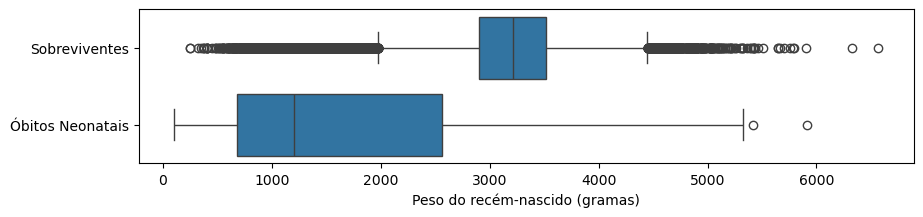

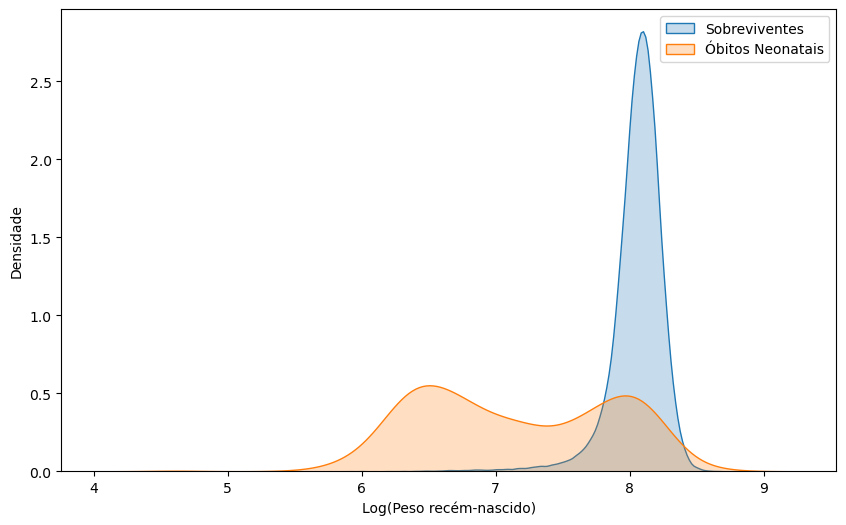

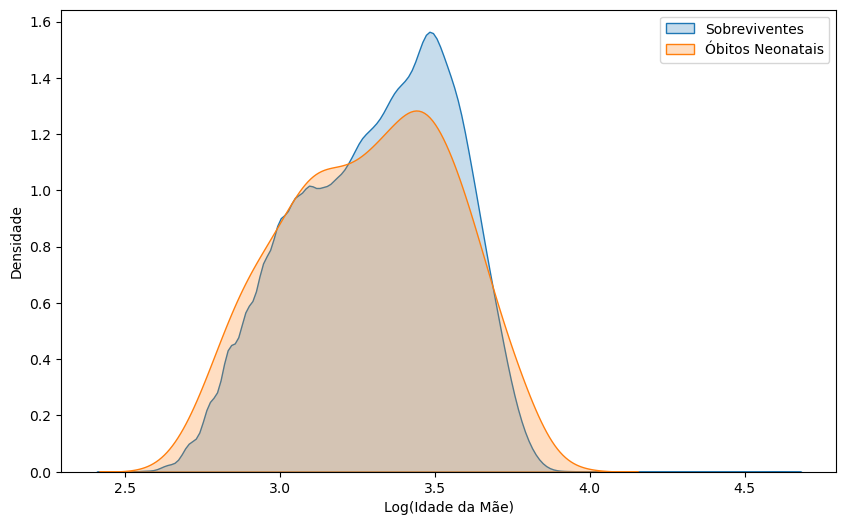

/tmp/ipykernel_4049452/1210406420.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_0, y=order_0, ax=axes[0], orient='h', palette='viridis')
/tmp/ipykernel_4049452/1210406420.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_1, y=order_1, ax=axes[1], orient='h', palette='viridis')
/tmp/ipykernel_4049452/1210406420.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_0, y=order_0, ax=axes[0], orient='h', palette='viridis')
/tmp/ipykernel_4049452/1210406420.py:31: FutureWarning: 

Passing `palette` without assigning 

Bivariate analysis completed.


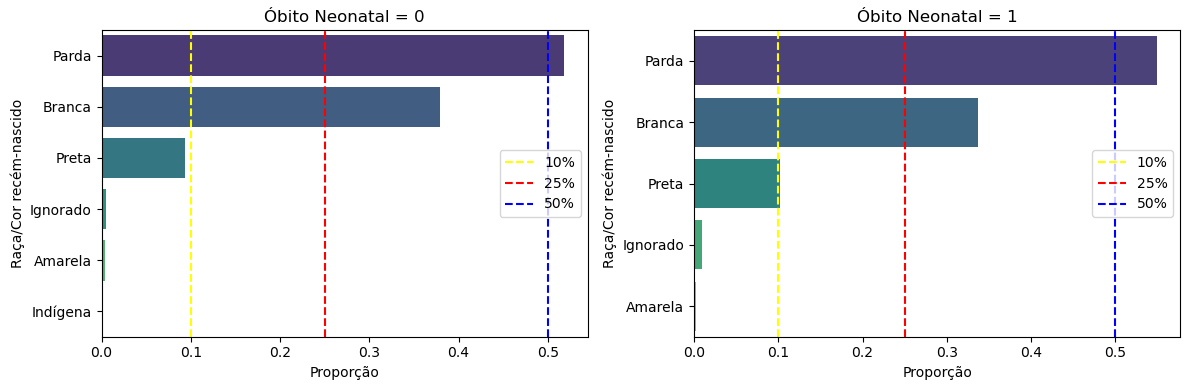

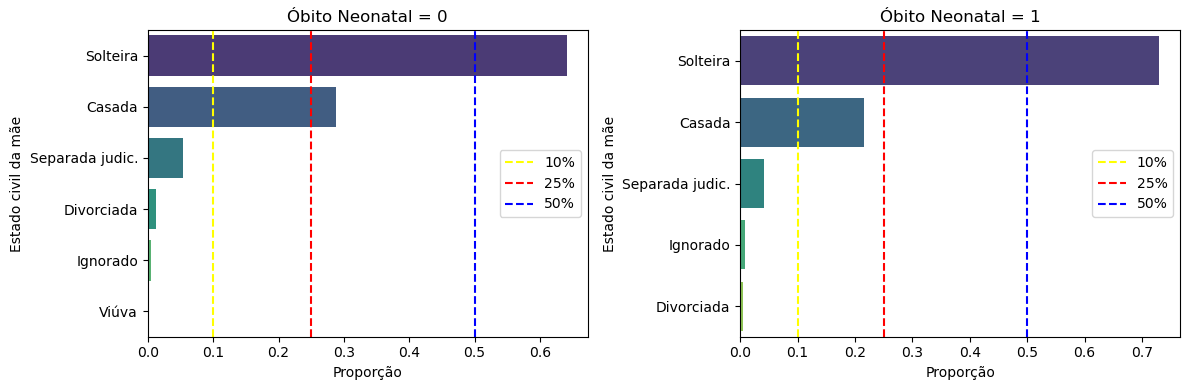

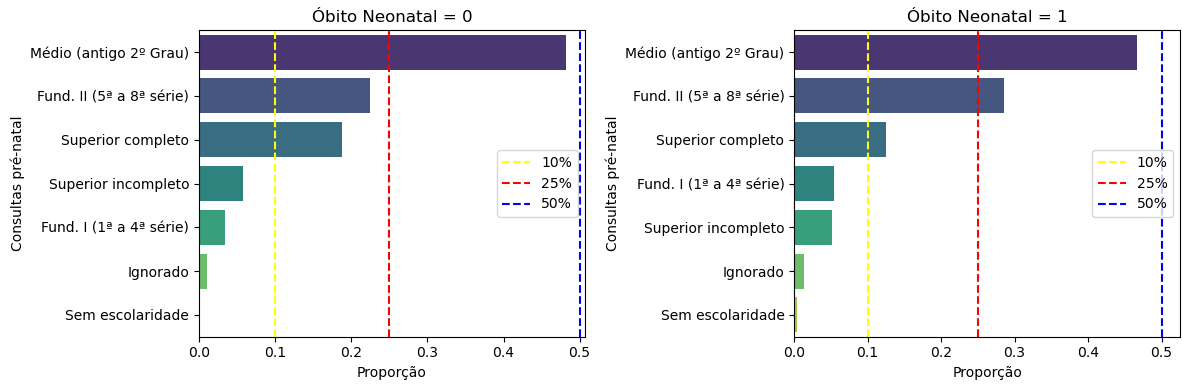

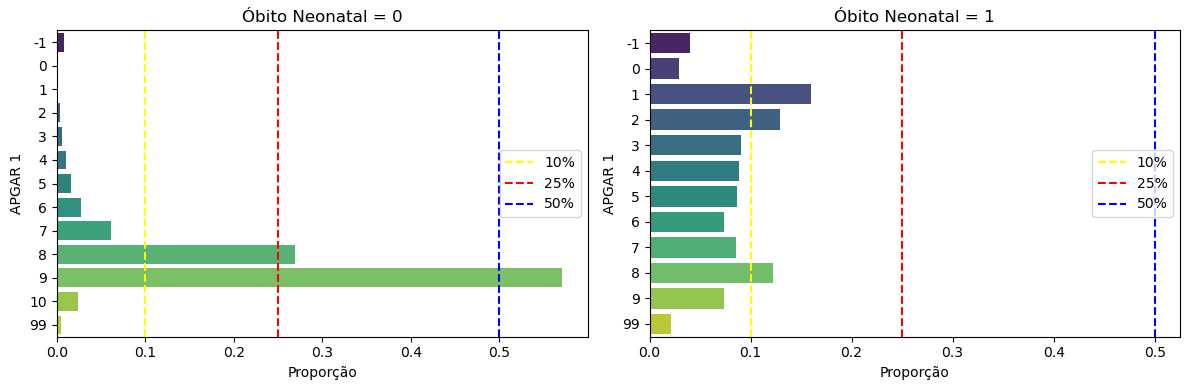

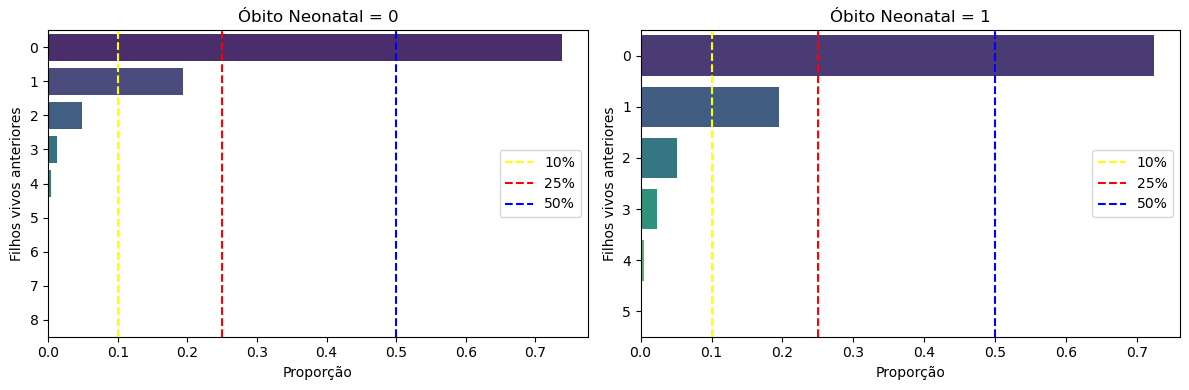

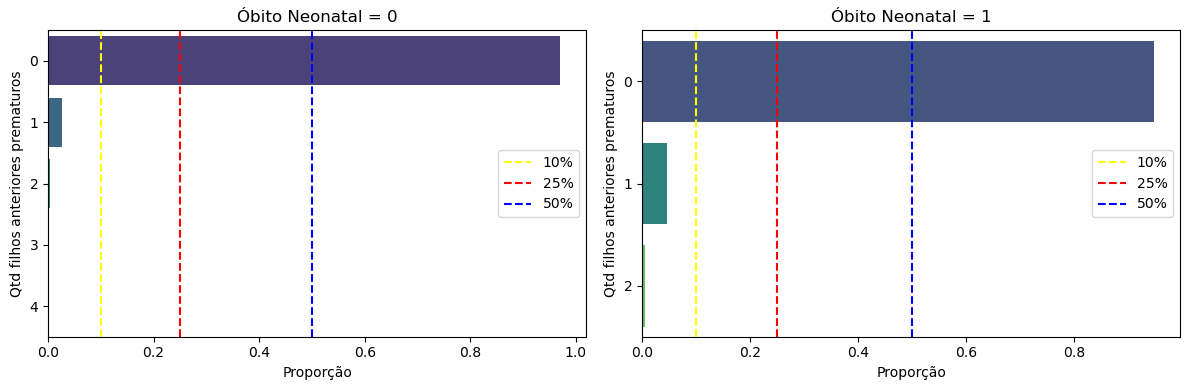

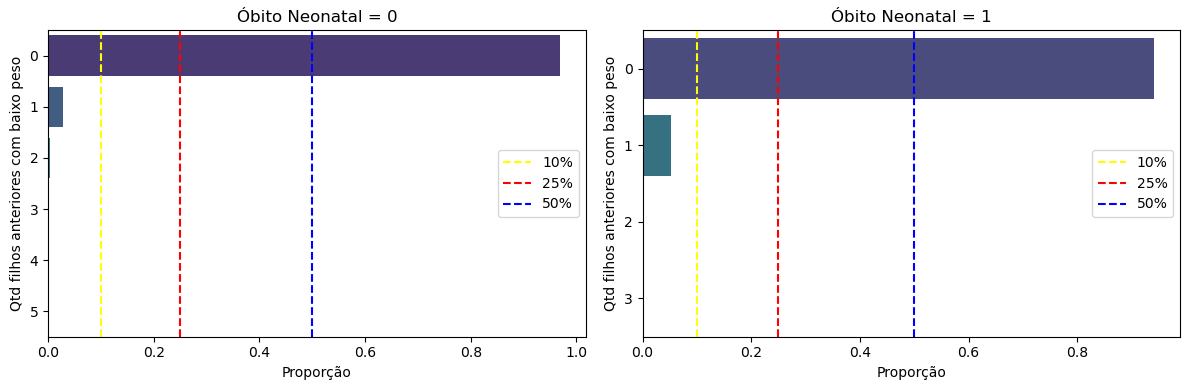

In [9]:
bivariate_analysis(df[selected_fields], selected_fields_labels, 'Mortes_infantil_RJ')

## univariate_analysis

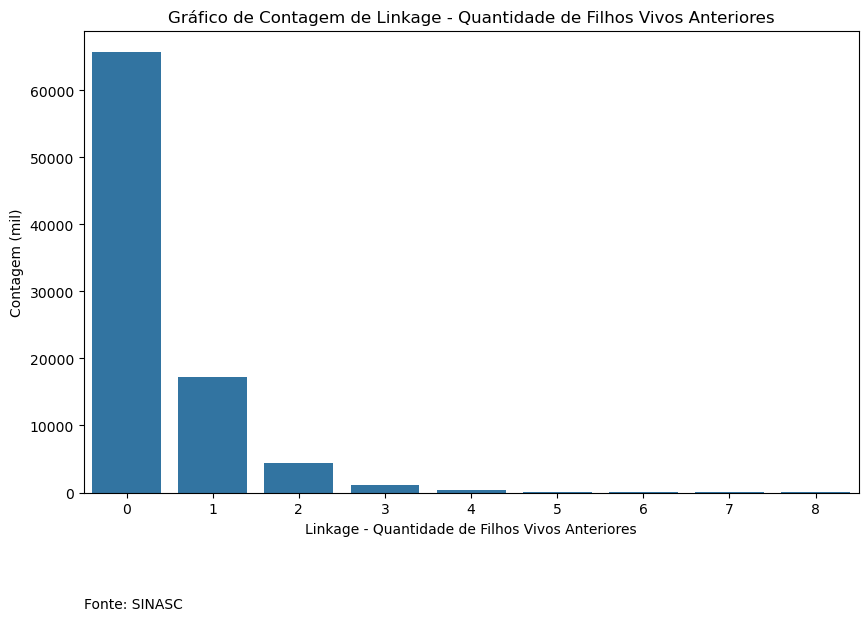

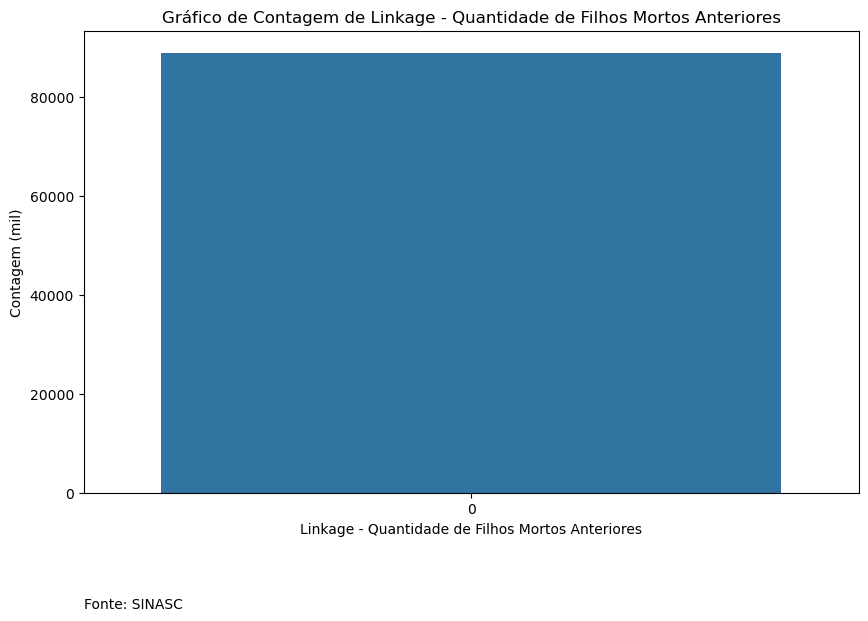

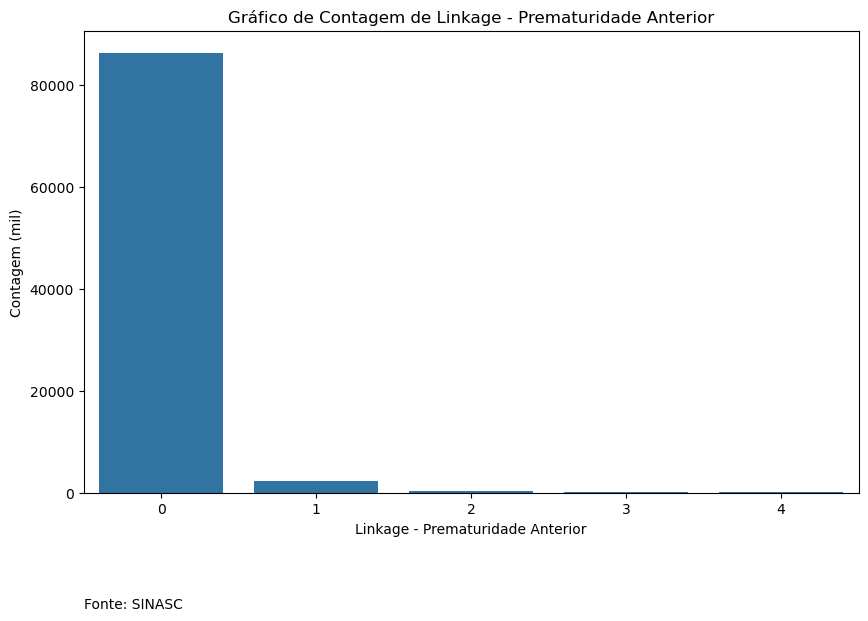

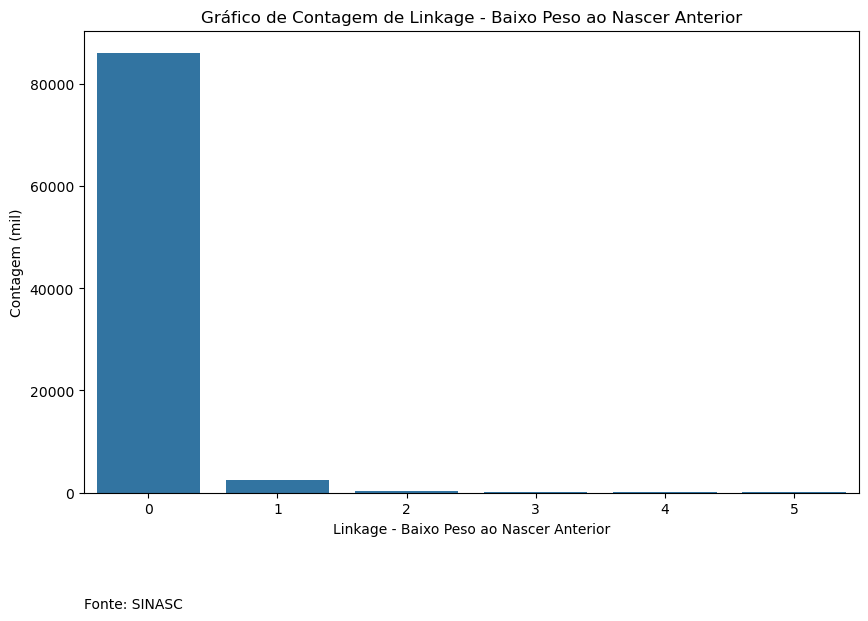

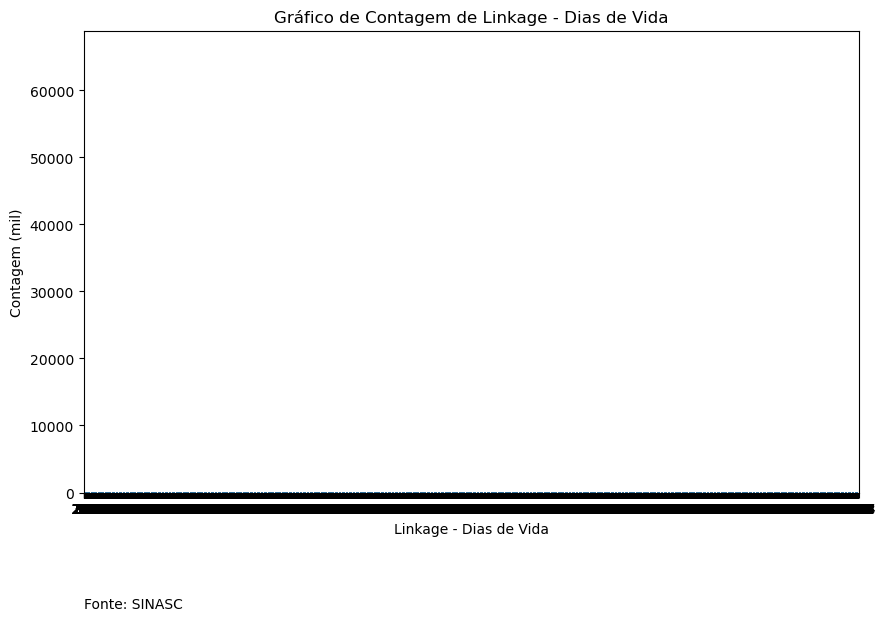

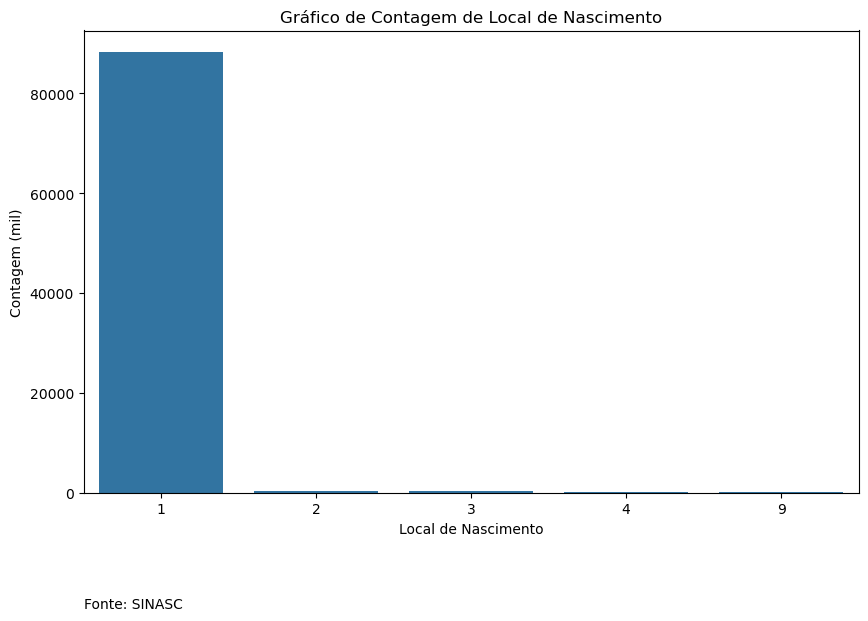

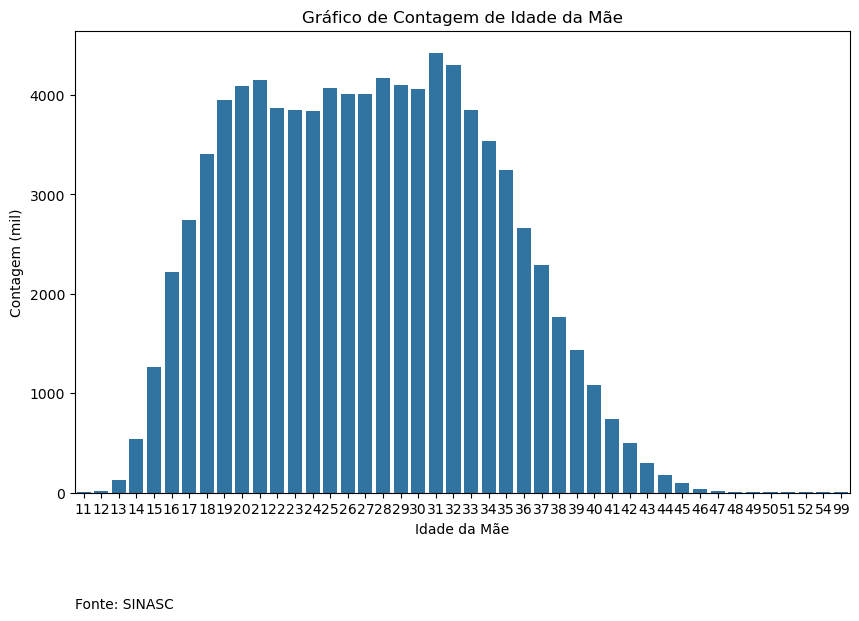

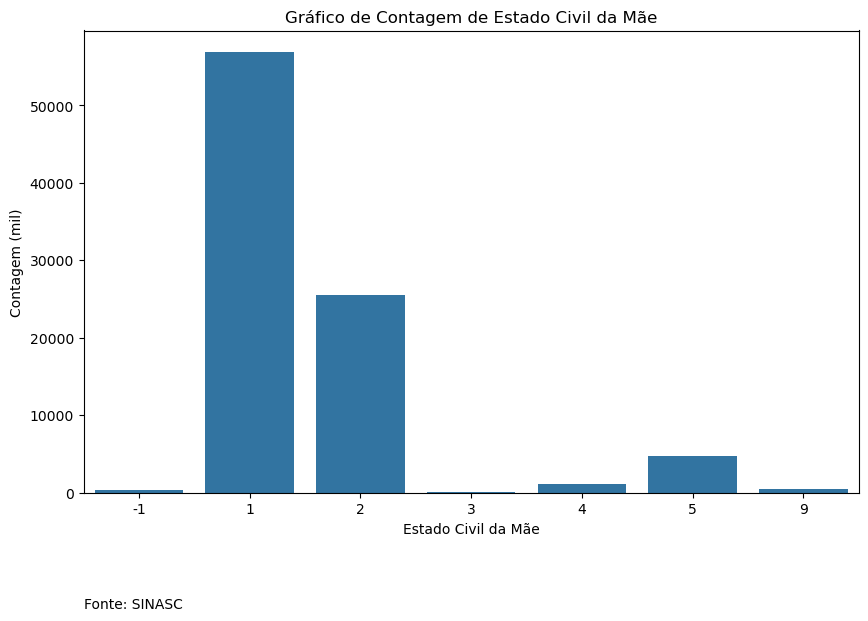

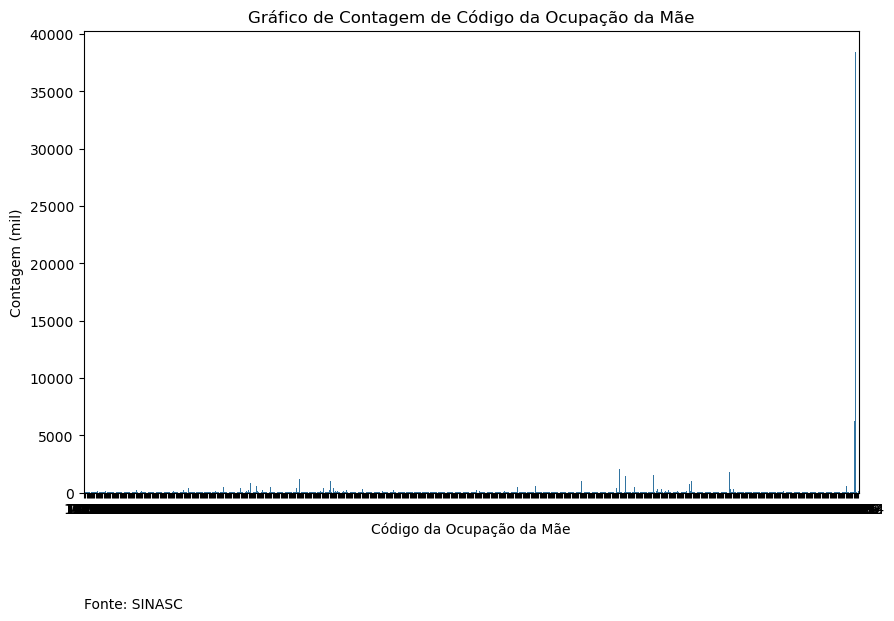

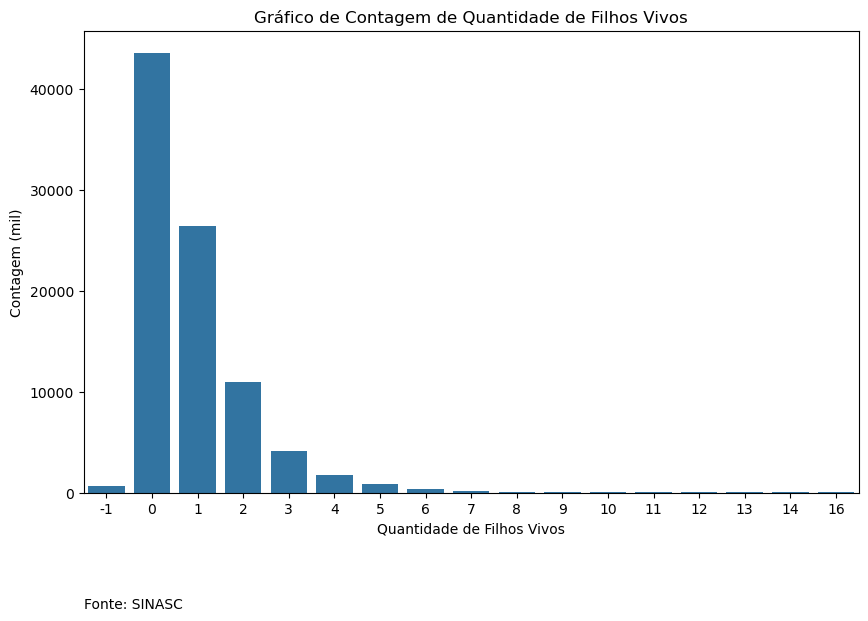

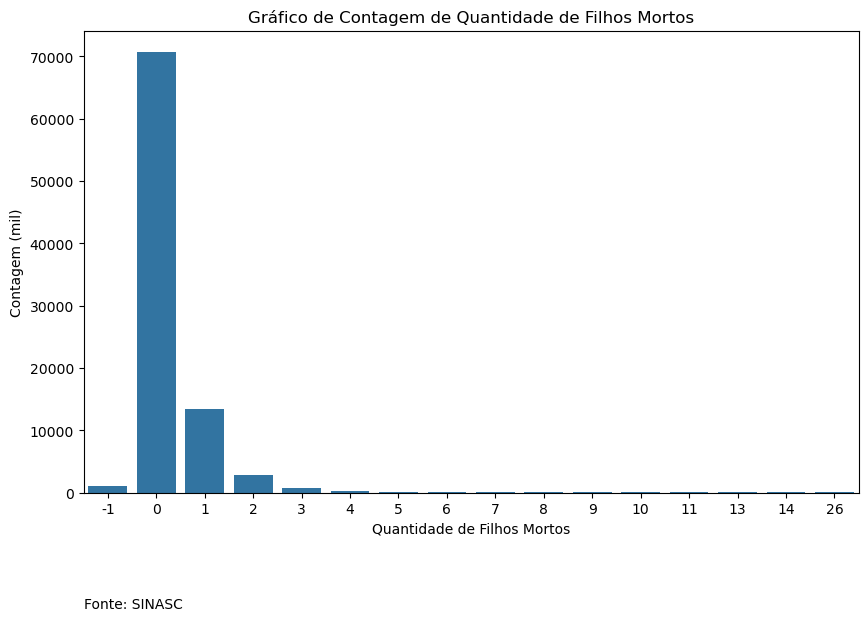

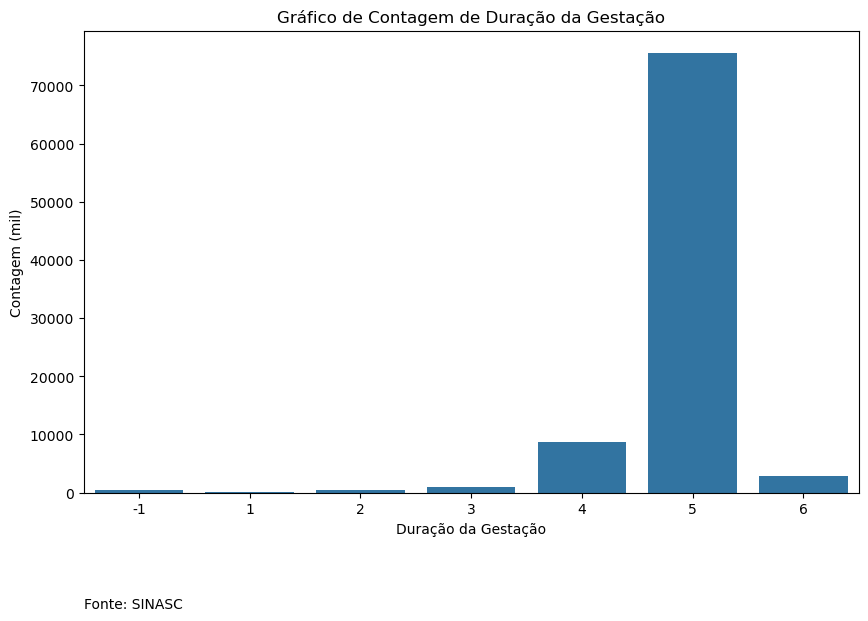

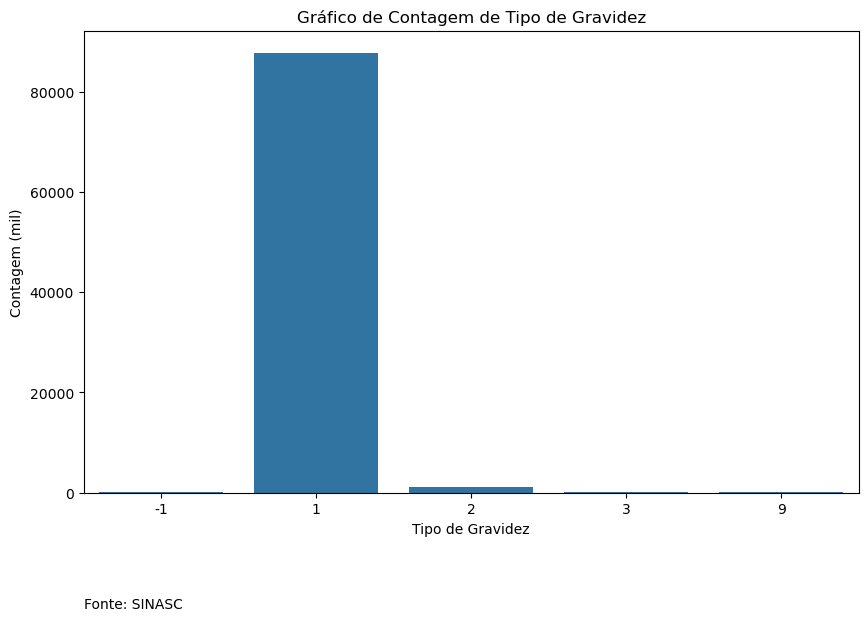

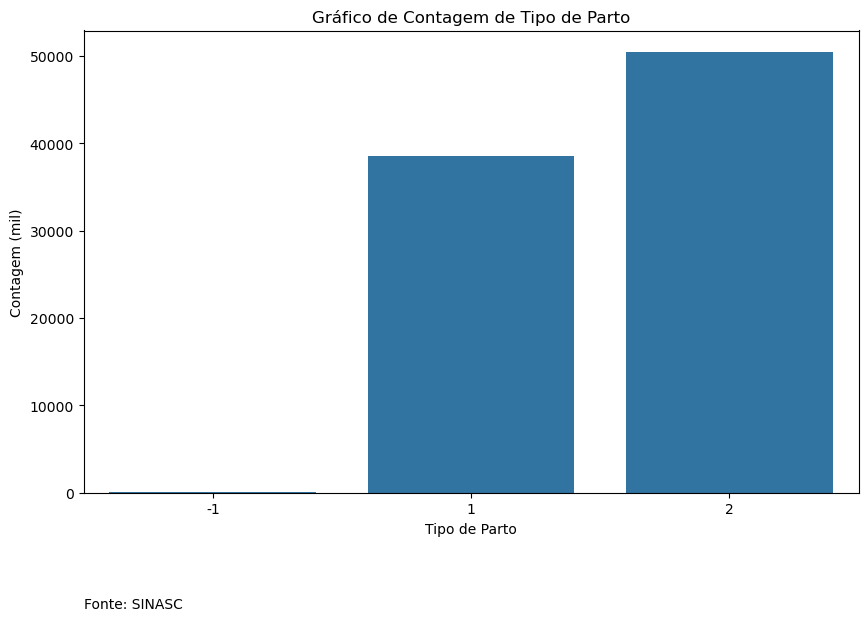

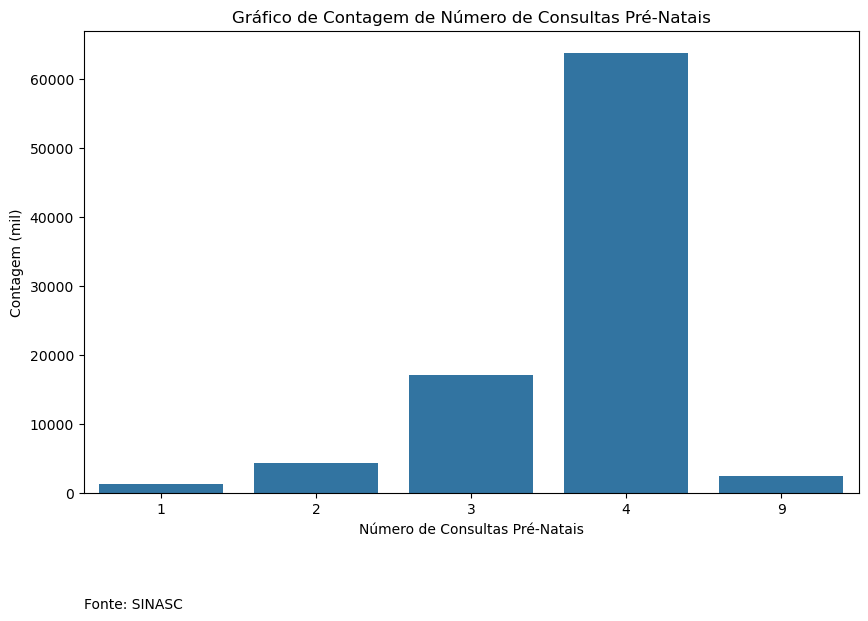

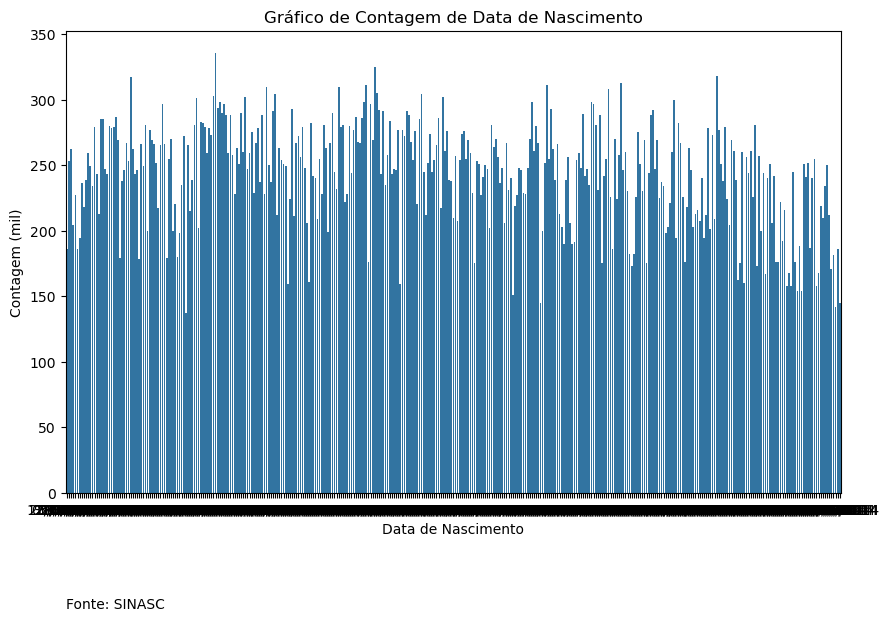

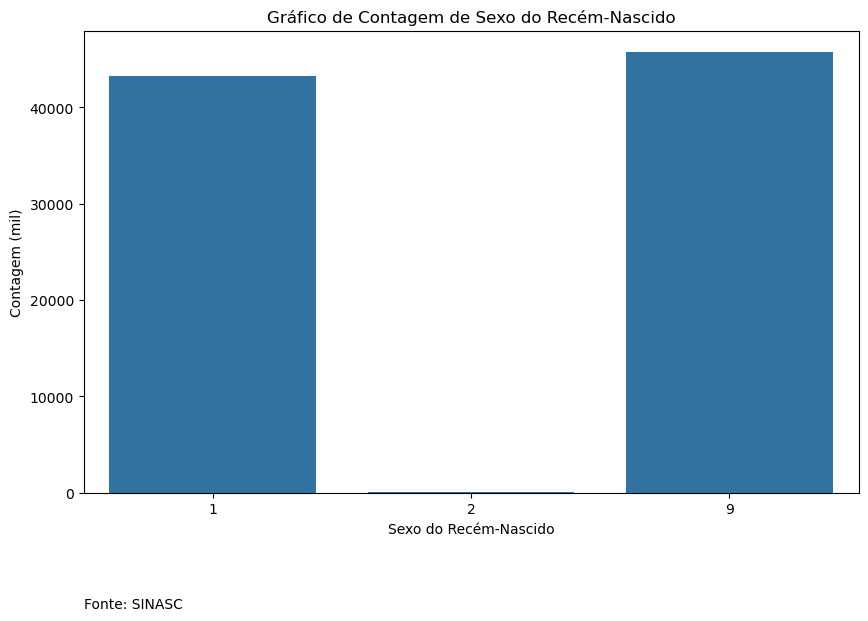

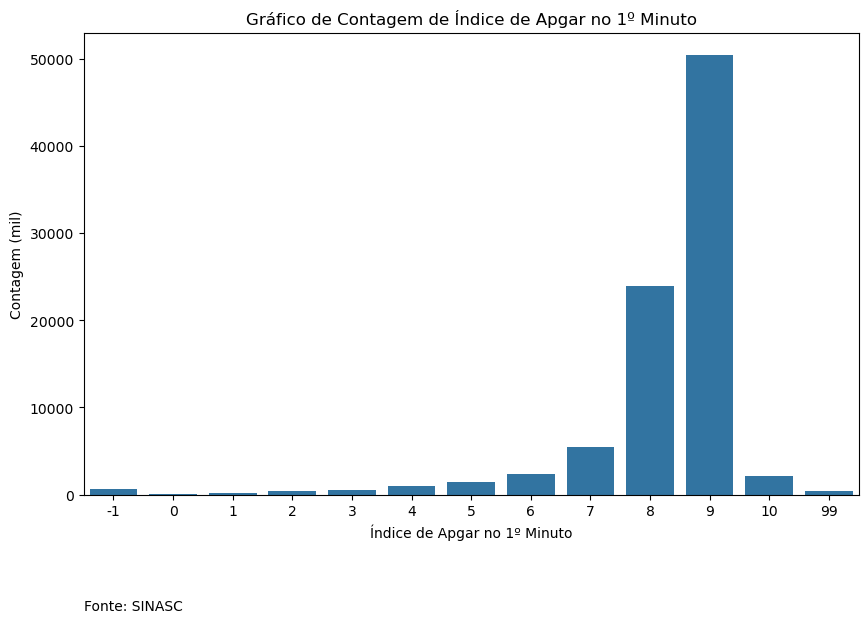

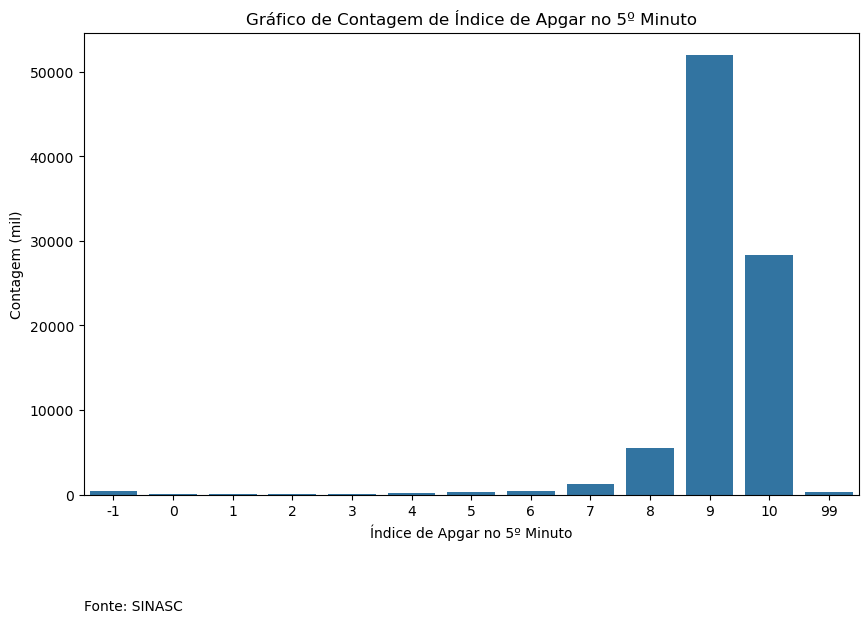

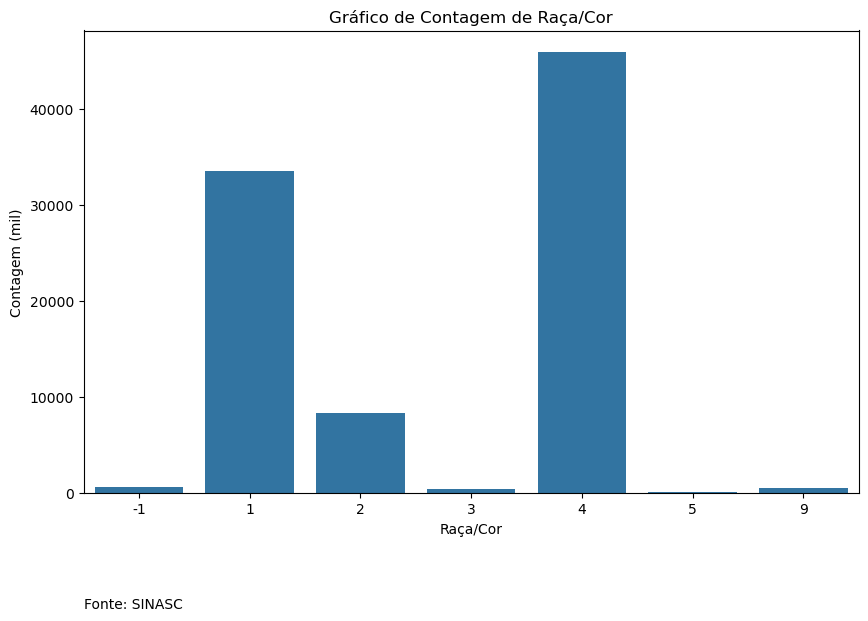

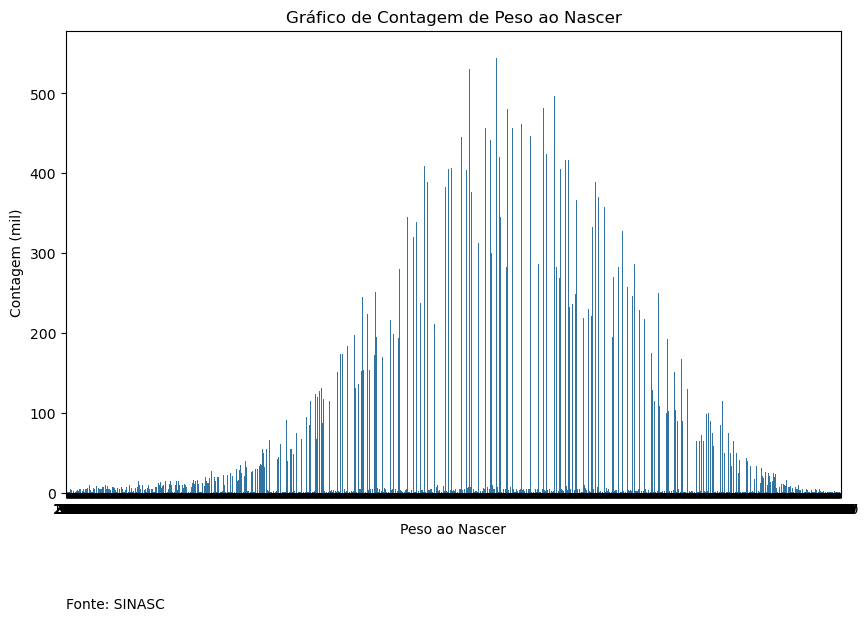

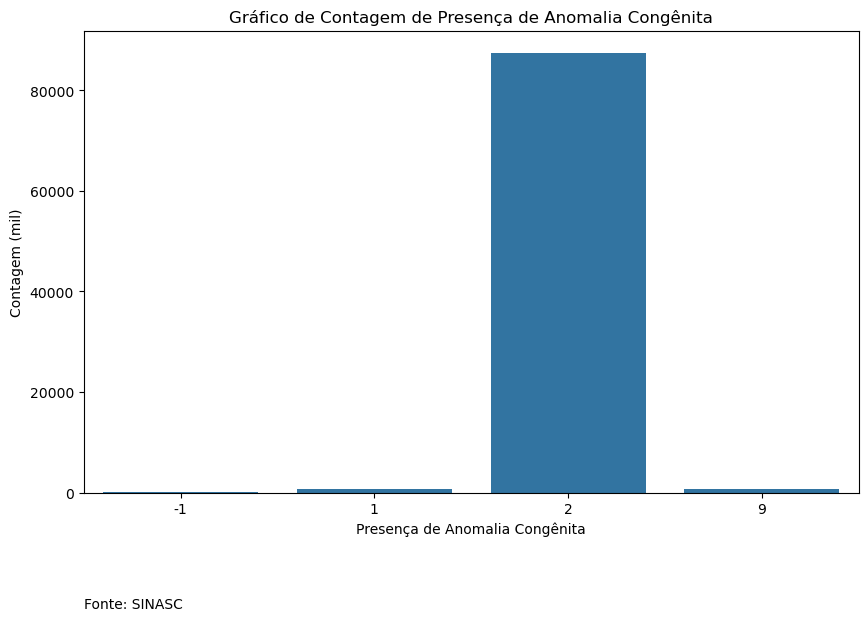

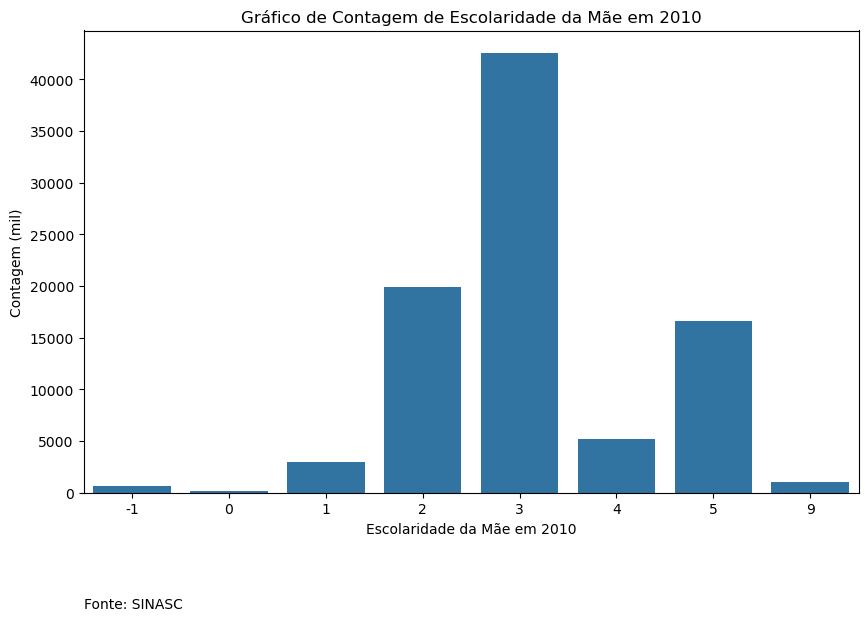

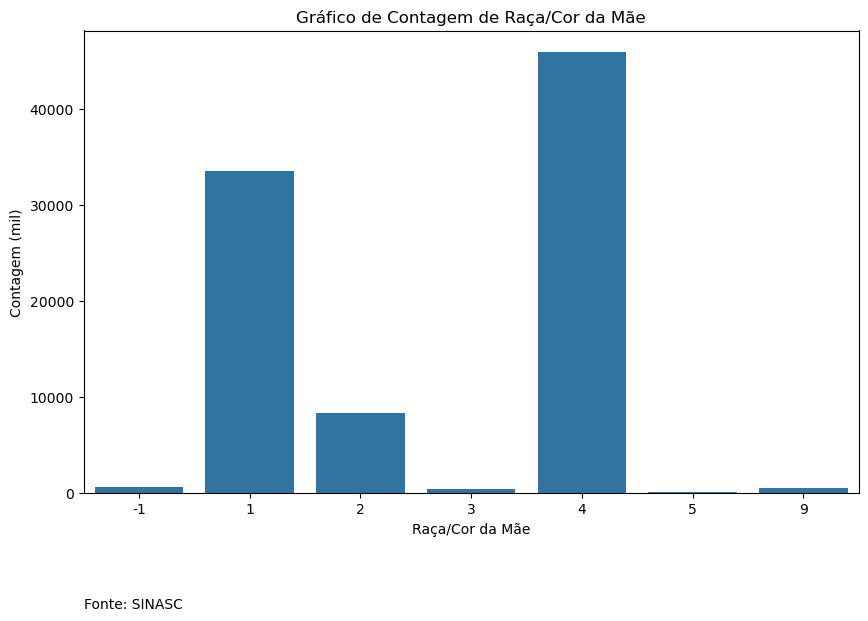

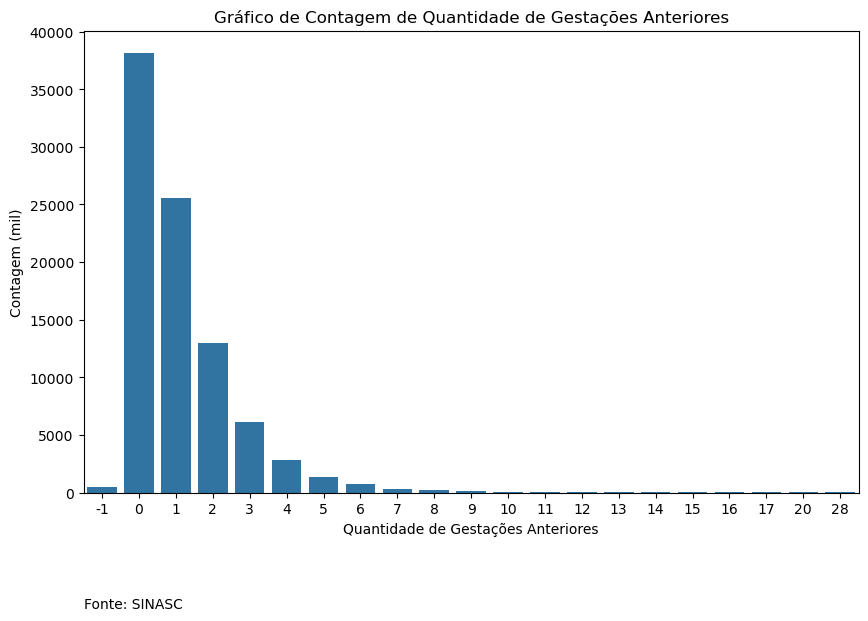

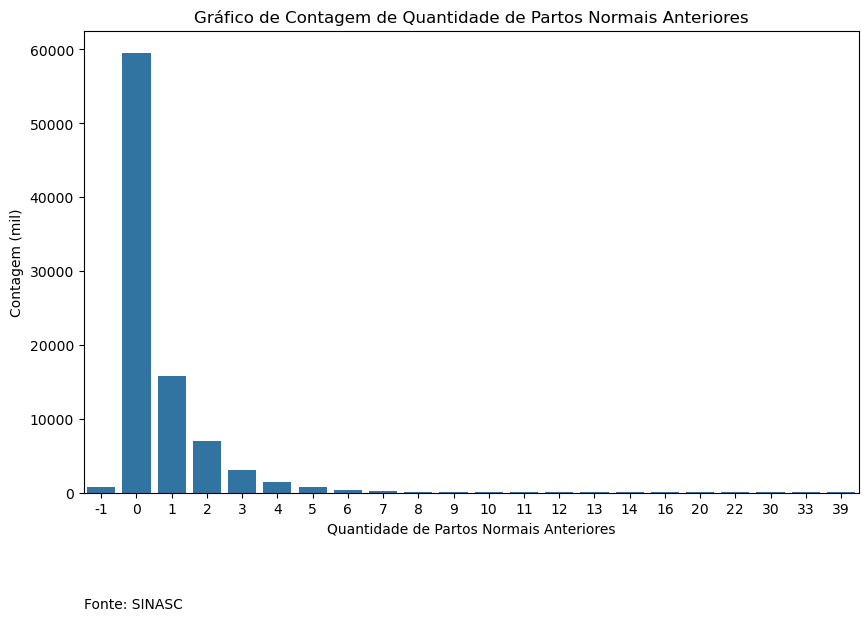

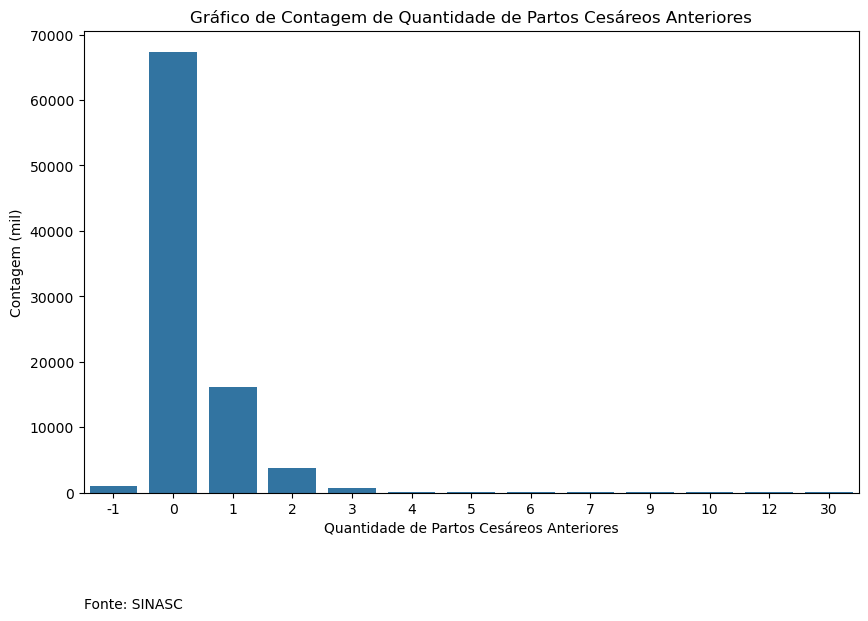

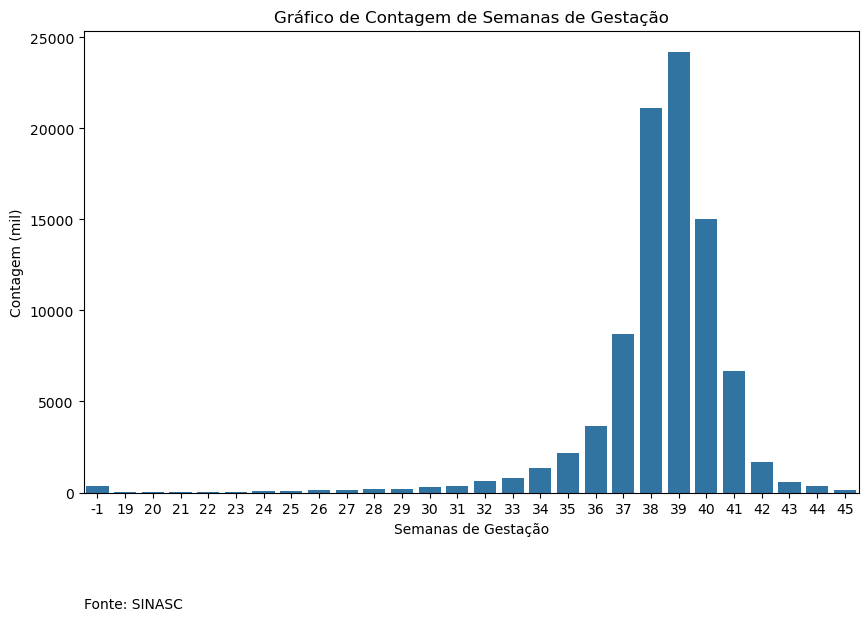

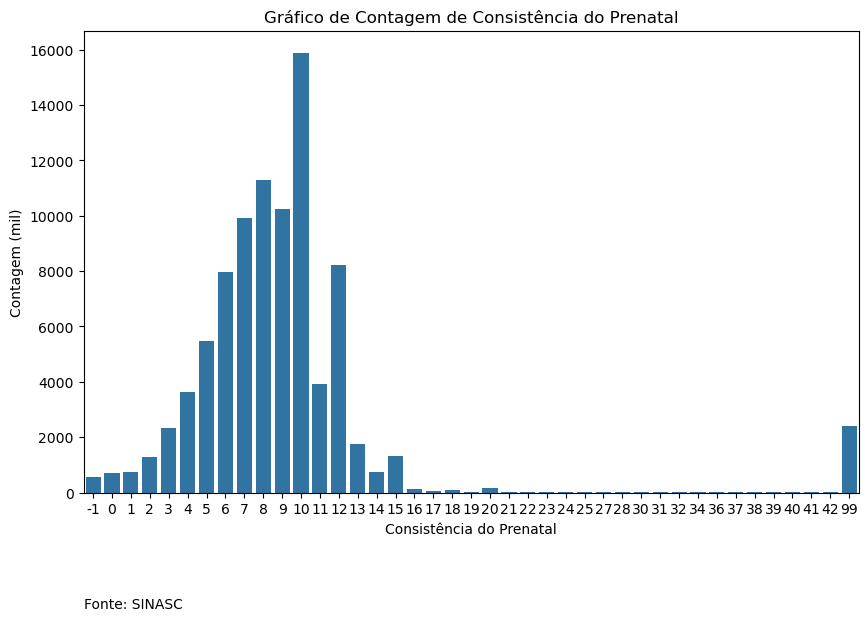

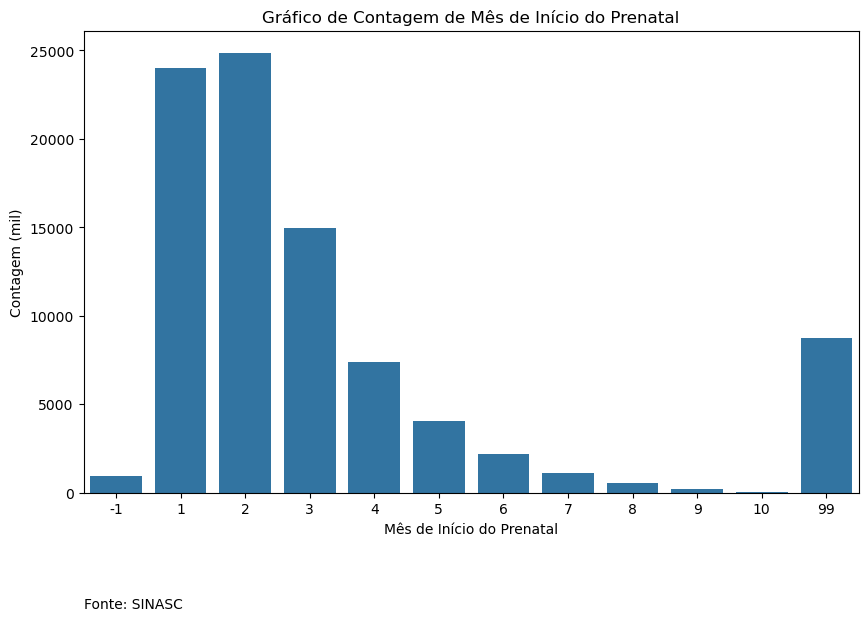

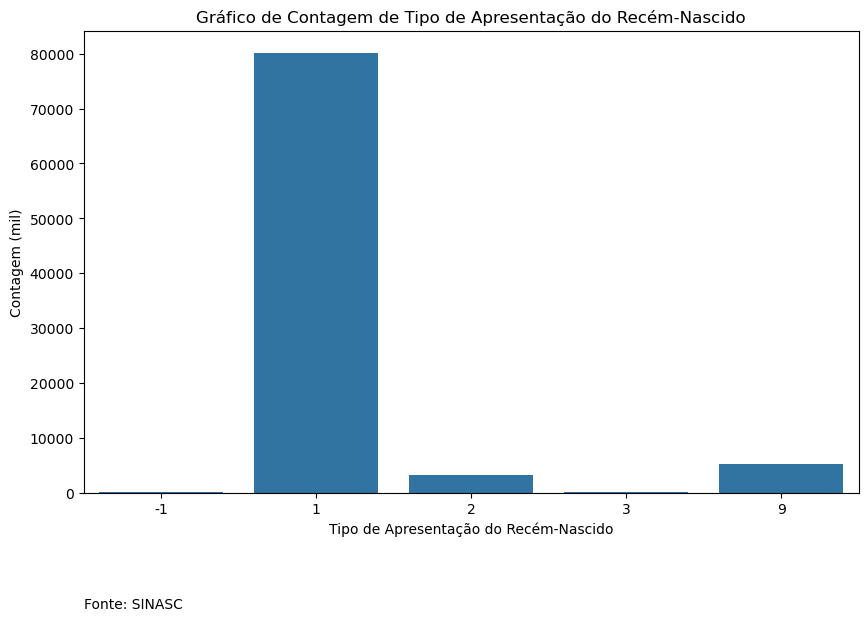

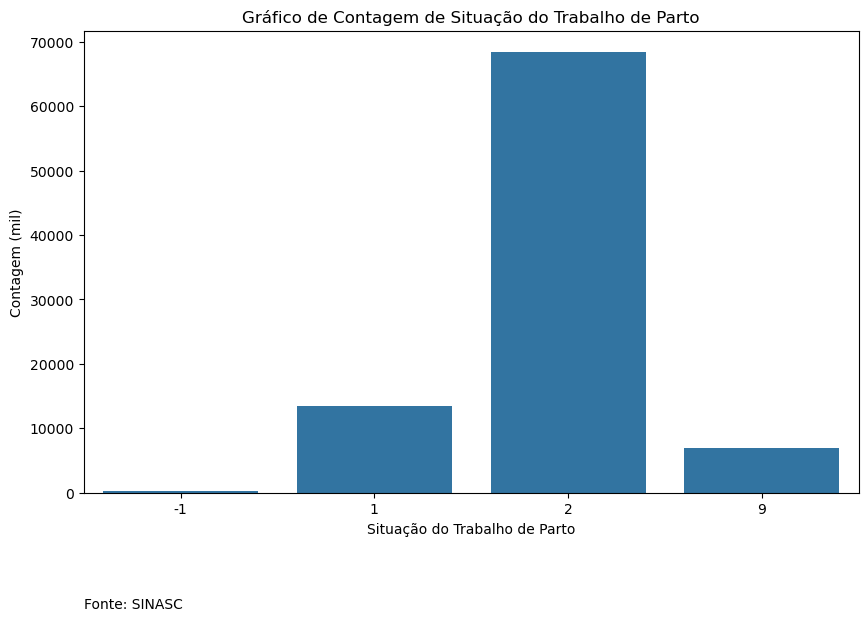

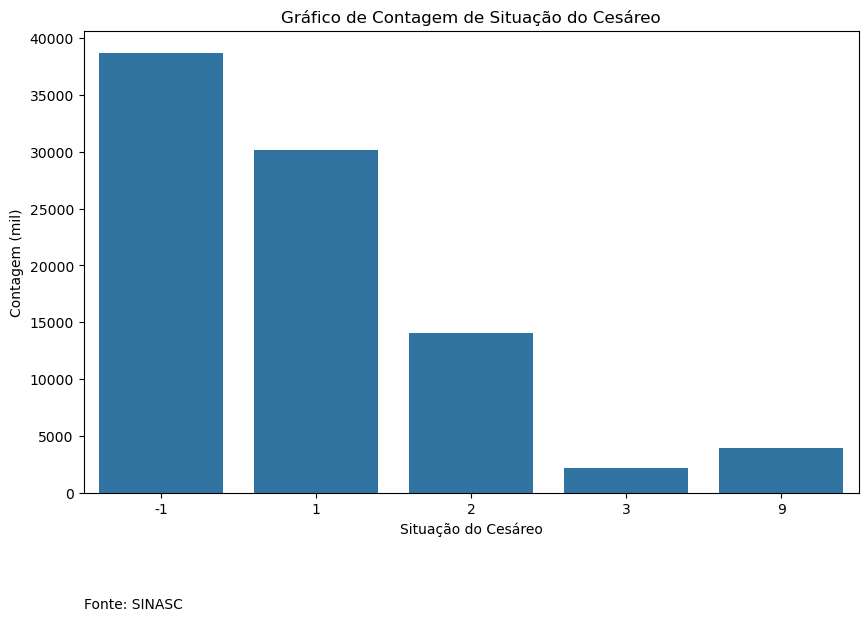

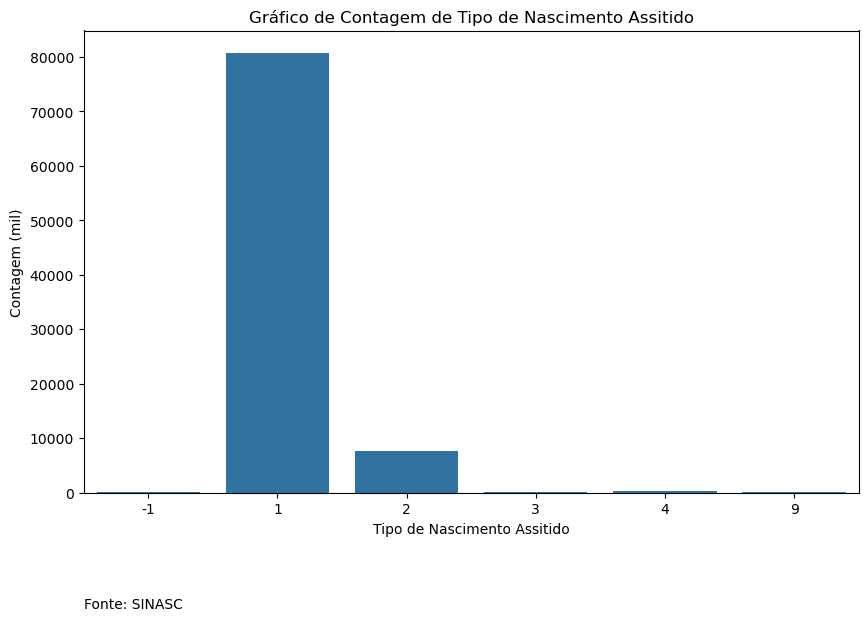

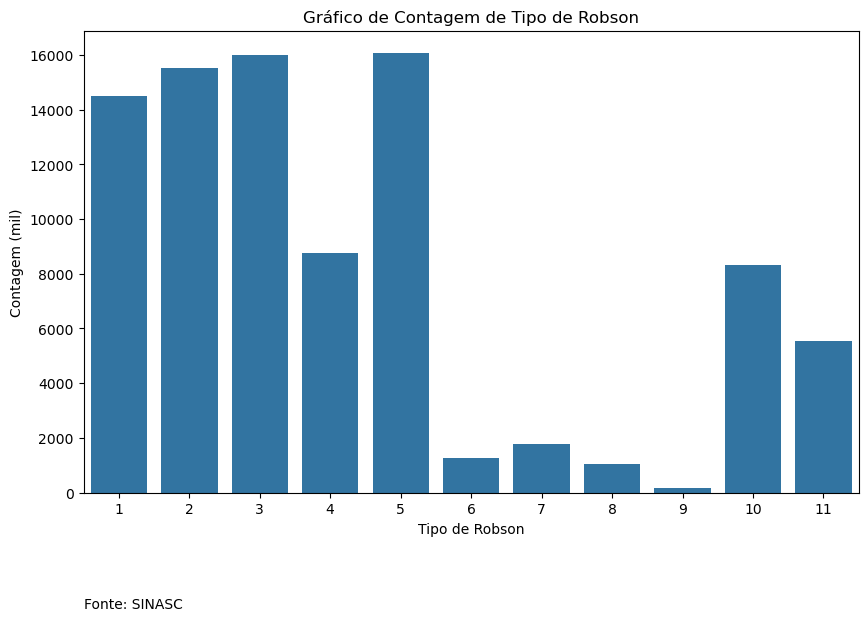

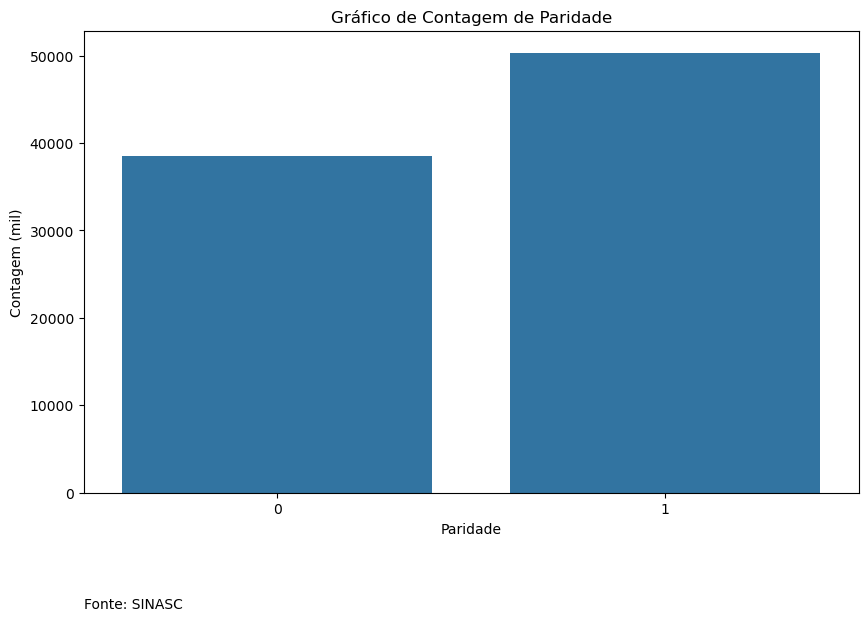

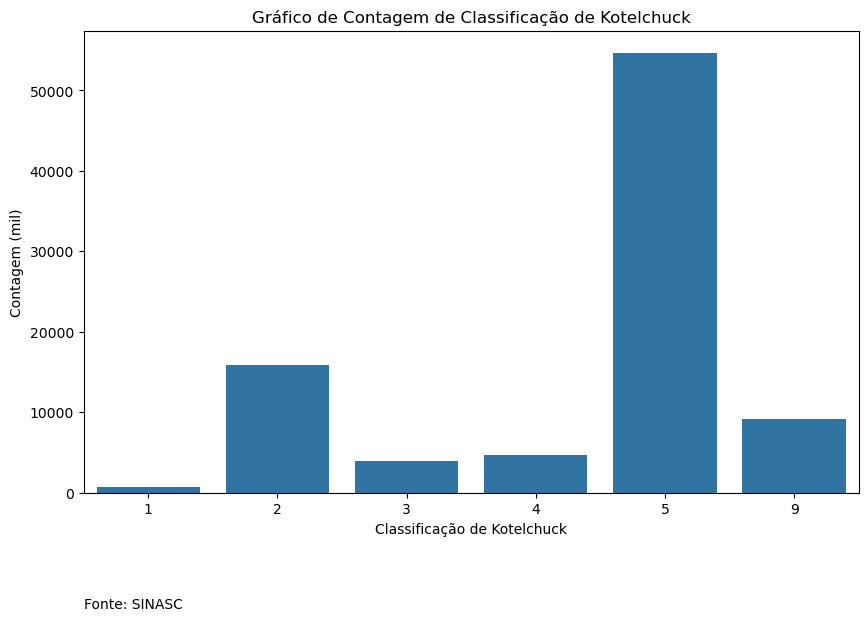

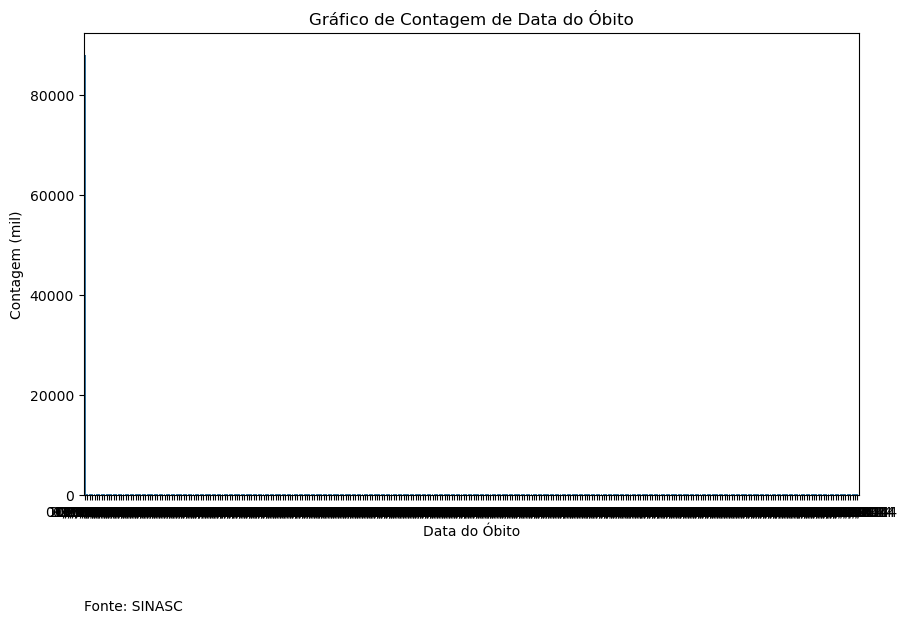

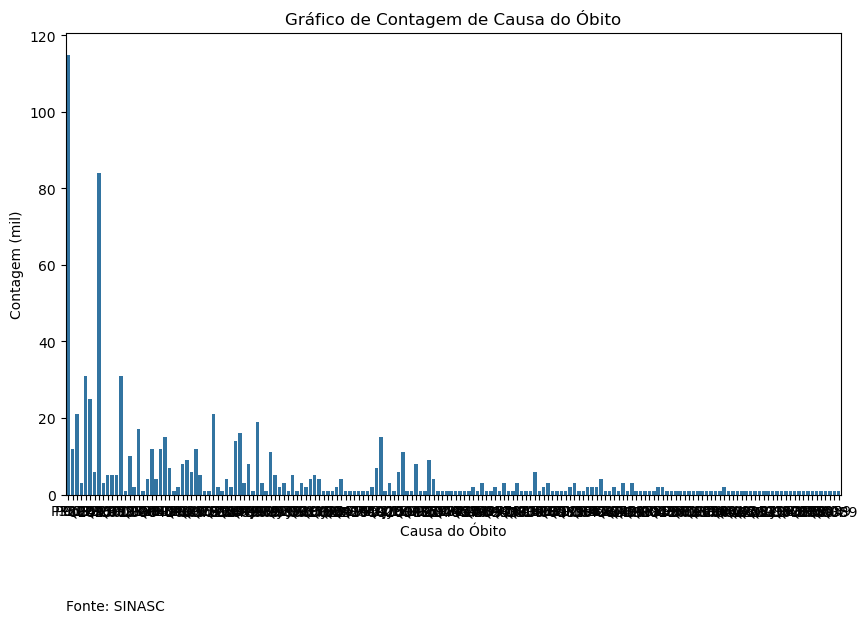

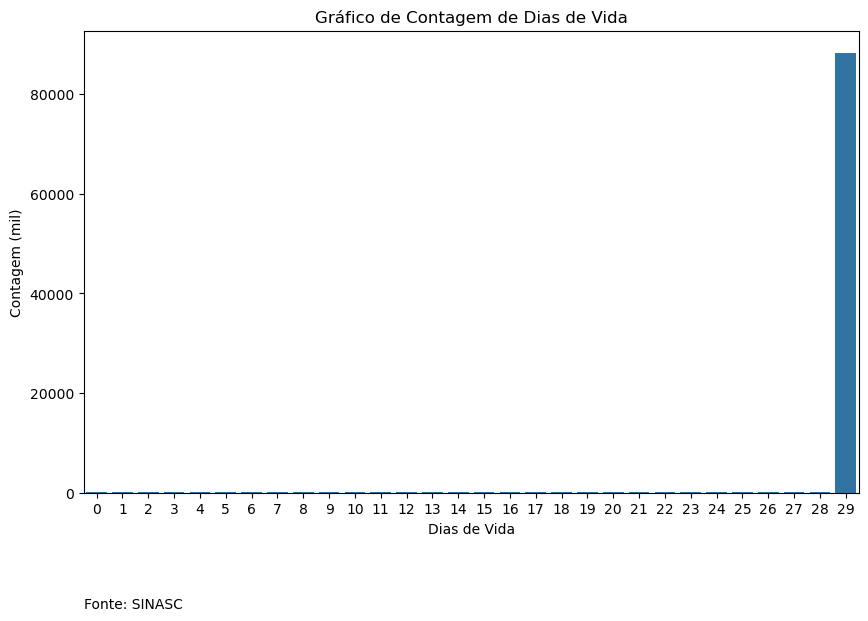

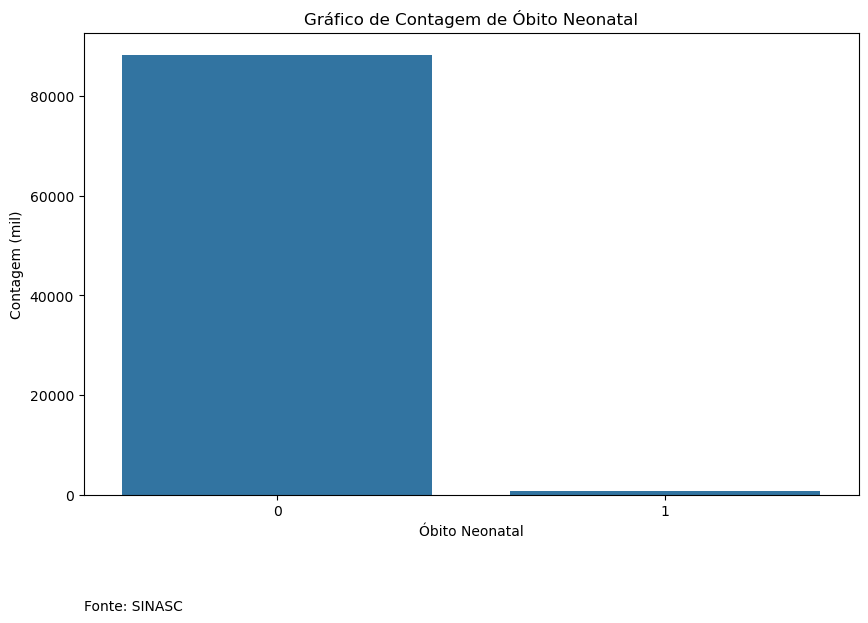

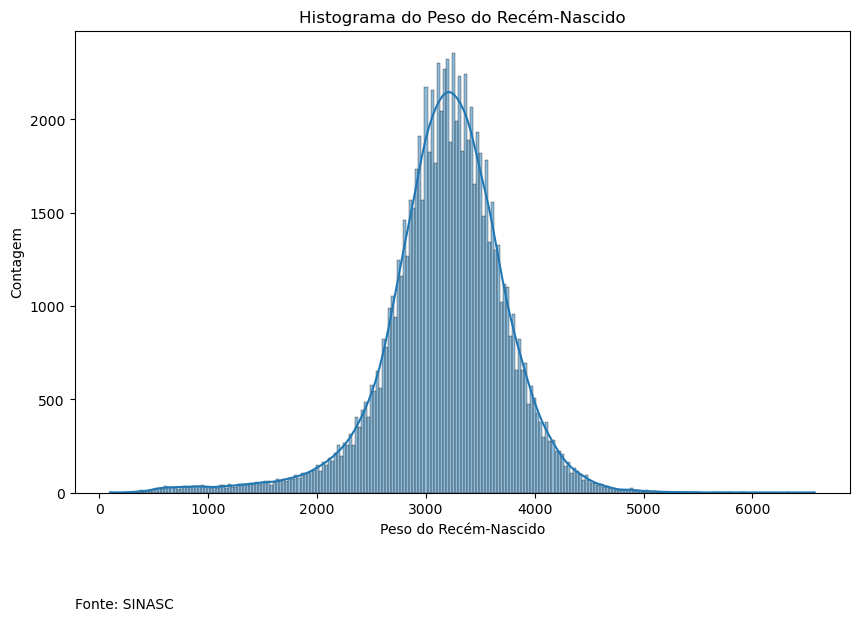

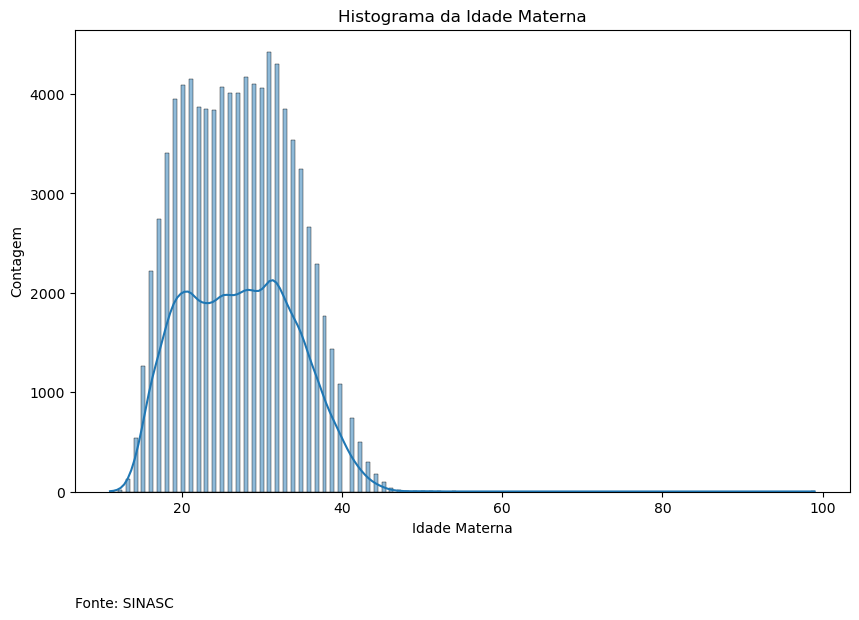

In [10]:
univariate_analysis(df[selected_fields], selected_fields_labels, 'Mortes_infantil_RJ')